## Ejemplo de símbolos expresiones y resolución de ecuaciones

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

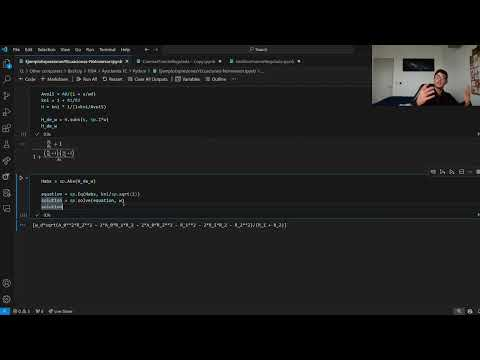

In [2]:

from IPython.display import YouTubeVideo

YouTubeVideo('_bHrF08hBe0', width=800, height=450)

### Respuesta en frecuencia de un no inversor
<img src="resources/NoInversor.jpg" alt="Texto alternativo" width="30%">


In [3]:
#Ejemplo: No inversor.
#Obtener la relación de resistencias que permite que la ganancia en continua sea 2
#y obtener el valor del polo dominante para que la frecuencia de corte sea 100kHz.

Vo, Vi, A0, wd, w, R1, R2 = sp.symbols('V_o, V_i, A_0, w_d, w, R_1, R_2', real=True, positive = True)
# Es una buena practica poner reales y complejos por separado. Tambien se puede definir "positive = True".
s = sp.symbols('s', complex=True)

In [4]:
AvolS = A0/(1 + s/wd)
kni = 1 + R1/R2
H = kni * 1/(1+kni/AvolS)

H_de_w = H.subs(s, sp.I*w)
H_de_w

(R_1/R_2 + 1)/(1 + (R_1/R_2 + 1)*(I*w/w_d + 1)/A_0)

In [5]:
Habs = sp.Abs(H_de_w)

equation = sp.Eq(Habs, kni/sp.sqrt(2))
solution = sp.solve(equation, w)
wc = solution[0]
wc

w_d*sqrt(A_0**2*R_2**2 - 2*A_0*R_1*R_2 - 2*A_0*R_2**2 - R_1**2 - 2*R_1*R_2 - R_2**2)/(R_1 + R_2)

In [6]:
eq1 = sp.Eq(kni, 2)
eq2 = sp.Eq(wc, 100e3)

solution2 = sp.solve([eq1, eq2] , [R1/R2, wd])

solution2

{R_1/R_2: 1.00000000000000,
 w_d: 70710.6781186548*R_1/sqrt(0.5*A_0**2*R_2**2 - A_0*R_1*R_2 - A_0*R_2**2 - 0.5*R_1**2 - R_1*R_2 - 0.5*R_2**2) + 70710.6781186548*R_2/sqrt(0.5*A_0**2*R_2**2 - A_0*R_1*R_2 - A_0*R_2**2 - 0.5*R_1**2 - R_1*R_2 - 0.5*R_2**2)}

In [7]:
solution2[R1/R2]

1.00000000000000

In [8]:
solution2[wd]

70710.6781186548*R_1/sqrt(0.5*A_0**2*R_2**2 - A_0*R_1*R_2 - A_0*R_2**2 - 0.5*R_1**2 - R_1*R_2 - 0.5*R_2**2) + 70710.6781186548*R_2/sqrt(0.5*A_0**2*R_2**2 - A_0*R_1*R_2 - A_0*R_2**2 - 0.5*R_1**2 - R_1*R_2 - 0.5*R_2**2)